In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('fraudTrain.csv')

In [8]:
df.shape

(1296675, 23)

In [10]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [16]:
df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num',
                   'merchant', 'first', 'last','street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time'],
        inplace = True)

In [18]:
df.drop(columns = ['merch_lat', 'merch_long'], inplace = True)

In [20]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495,"Psychologist, counselling",0
1,grocery_pos,107.23,F,WA,149,Special educational needs teacher,0
2,entertainment,220.11,M,ID,4154,Nature conservation officer,0
3,gas_transport,45.00,M,MT,1939,Patent attorney,0
4,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0


In [22]:
df.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [24]:
df.dropna(inplace = True)

In [26]:
df.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [28]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [30]:
category_df = (pd.get_dummies(df['category'])).astype('int')

In [32]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
df.drop(columns = ['category'], inplace = True)

In [36]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495,"Psychologist, counselling",0
1,107.23,F,WA,149,Special educational needs teacher,0
2,220.11,M,ID,4154,Nature conservation officer,0


In [38]:
df = pd.concat([df, category_df], axis = 1)

In [40]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495,"Psychologist, counselling",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149,Special educational needs teacher,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154,Nature conservation officer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [44]:
df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)

In [45]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [48]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [50]:
state_df = (pd.get_dummies(df['state'])).astype('int')

In [51]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
df.drop(columns = ['state'], inplace = True)

In [56]:
df = pd.concat([df, state_df], axis = 1)

In [57]:
df.head(3)

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495,"Psychologist, counselling",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,Special educational needs teacher,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154,Nature conservation officer,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df['job'].unique().shape

(494,)

In [62]:
job_df = (pd.get_dummies(df['job'])).astype('int')

In [63]:
job_df.head()

,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education",...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df.drop(columns = ['job'], inplace = True)

In [68]:
df = pd.concat([df, job_df], axis = 1)

In [70]:
df.shape

(1296675, 563)

In [72]:
df.head(3)

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [75]:
X.shape

(1296675, 562)

In [76]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

MemoryError: Unable to allocate 5.37 GiB for an array with shape (1281663, 562) and data type float64

In [ ]:
y.value_counts()

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [ ]:
X.head()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [65]:
X_train.shape, X_test.shape

((43204, 542), (10802, 542))

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(542, 300)
        self.fc2 = nn.Linear(300, 150)
        self.fc3 = nn.Linear(150, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = NeuralNetwork()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)

num_epochs = 10
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch 1/10
217/217 [==============================] - 4s 5ms/step - loss: 0.1104 - accuracy: 0.9702
Epoch 2/10
217/217 [==============================] - 1s 5ms/step - loss: 0.0161 - accuracy: 0.9959
Epoch 3/10
217/217 [==============================] - 1s 5ms/step - loss: 0.0128 - accuracy: 0.9967
Epoch 4/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0106 - accuracy: 0.9971
Epoch 5/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0093 - accuracy: 0.9975
Epoch 6/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 7/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9975
Epoch 8/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.9979
Epoch 9/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9981
Epoch 10/10
217/217 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9981

In [68]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

338/338 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9977
Model Accuracy : 99.76856112480164


In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               162900    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 208201 (813.29 KB)
Trainable params: 208201 (813.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
pred = model.predict(X_test)

338/338 [==============================] - 1s 1ms/step


In [76]:
binary_pred = (pred > 0.5).astype('int')

In [77]:
binary_pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5401
         1.0       1.00      1.00      1.00      5401

    accuracy                           1.00     10802
   macro avg       1.00      1.00      1.00     10802
weighted avg       1.00      1.00      1.00     10802



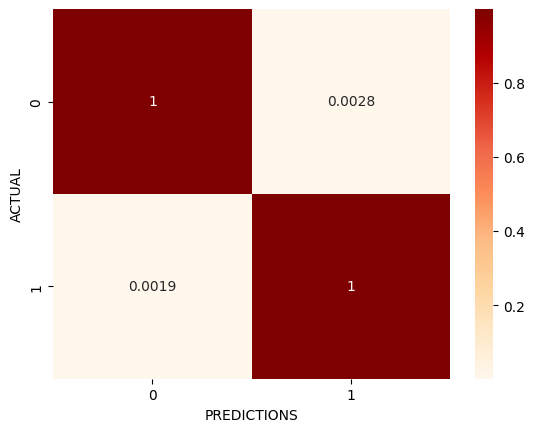

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');